In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# KNN Classification

```01_knn_class.ipynb```

In [ ]:
import 

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [2]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

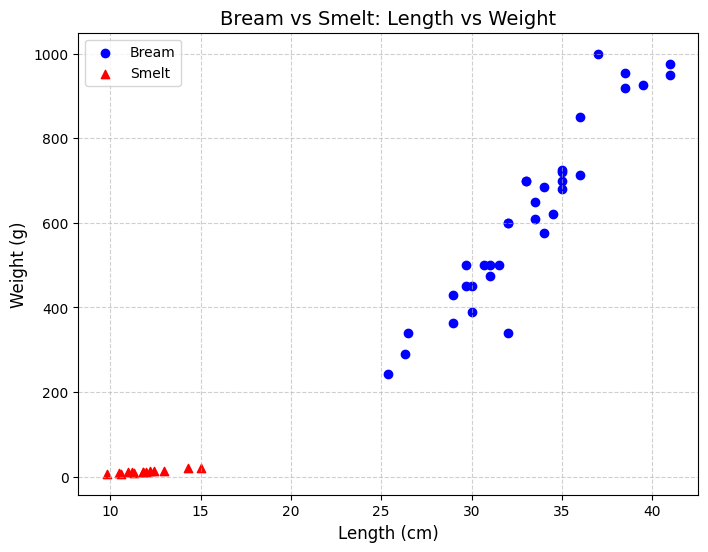

In [ ]:
# 산점도(도미, 빙어) _GPT 작성

import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(8,6))
plt.scatter(bream_length, bream_weight, color='blue', marker='o', label='Bream')
plt.scatter(smelt_length, smelt_weight, color='red', marker='^', label='Smelt')

# 제목과 라벨
plt.title("Bream vs Smelt: Length vs Weight", fontsize=14)
plt.xlabel("Length (cm)", fontsize=12)
plt.ylabel("Weight (g)", fontsize=12)

# 범례와 격자
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 표시
plt.show()

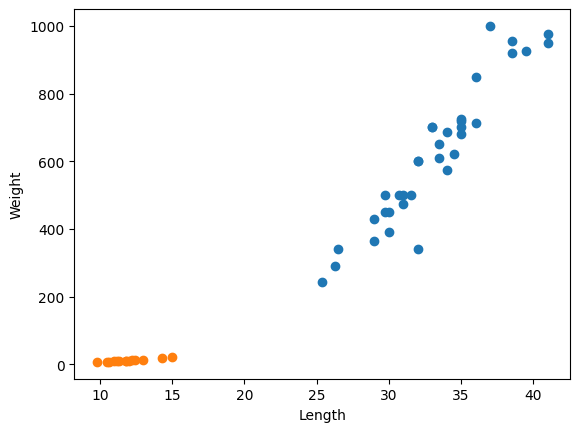

In [ ]:
# 산점도(도미, 빙어) _쌤 작성

import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [ ]:
# 혹시! 위 도미와 빙어의 데이터를 참조하여 머신러닝을 만들고 싶은데.... 
# 예를 들어서 내가 사이즈나 무게를 입력하면 도미다! 빙어다! 라고 알려주는 그런 머신러닝이야!

# 분류 머신러닝_GPT 작성

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# (길이, 무게) 쌍으로 합치기
bream_data = np.column_stack((bream_length, bream_weight))
smelt_data = np.column_stack((smelt_length, smelt_weight))

# 데이터 합치기
fish_data = np.concatenate((bream_data, smelt_data))
fish_target = np.concatenate((np.ones(len(bream_data)), np.zeros(len(smelt_data))))
# 도미 = 1, 빙어 = 0

# KNN 모델 생성 및 학습
kn = KNeighborsClassifier(n_neighbors=5)  # k=5
kn.fit(fish_data, fish_target)

# 예측 테스트
test_fish = [[30, 600], [12, 10], [25, 300]]  # (길이, 무게)
pred = kn.predict(test_fish)

print("예측 결과:", pred)  # [1. 0. 1.] → 도미, 빙어, 도미

예측 결과: [1. 0. 1.]


정확도(Accuracy): 1.000

분류 리포트:
               precision    recall  f1-score   support

    Smelt(0)       1.00      1.00      1.00         4
    Bream(1)       1.00      1.00      1.00         9

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

혼동행렬:
 [[4 0]
 [0 9]]


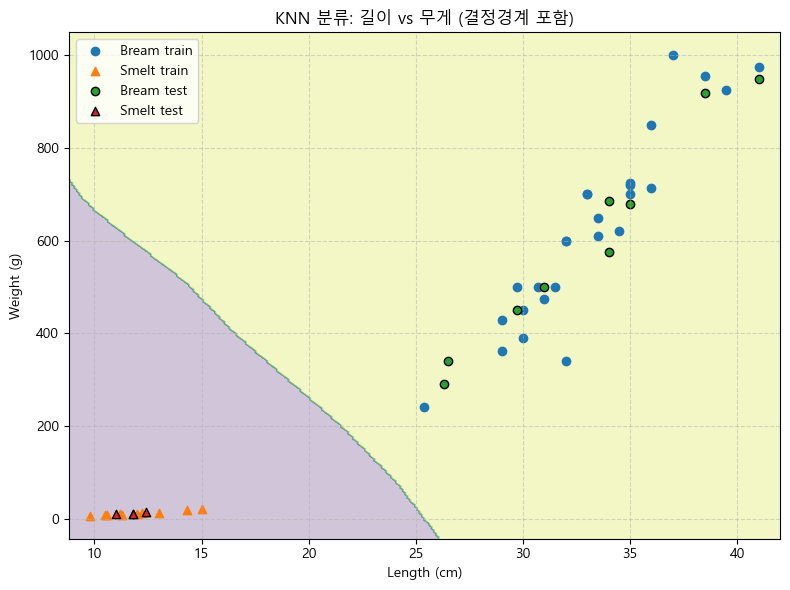

샘플 예측: ['도미(Bream)', '빙어(Smelt)', '도미(Bream)']


In [ ]:
# 분류 머신러닝_고급_GPT 작성
# 1) 데이터 결합→라벨링, 2) train_test_split(stratify=y), 3) StandardScaler+KNN 파이프라인 학습, 
# 4) 정확도·분류리포트·혼동행렬 출력, 5) 결정경계 시각화)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) 데이터 (사용자 제공)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 2) (길이, 무게) 결합 및 라벨: 도미=1, 빙어=0
X = np.column_stack([
    np.array(bream_length + smelt_length, dtype=float),
    np.array(bream_weight + smelt_weight, dtype=float)
])
y = np.concatenate([np.ones(len(bream_length)), np.zeros(len(smelt_length))])

# 3) 훈련/테스트 분리 (클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# 4) 파이프라인(KNN + 표준화) 학습
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
model.fit(X_train, y_train)

# 5) 평가
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"정확도(Accuracy): {acc:.3f}\n")
print("분류 리포트:\n", classification_report(y_test, y_pred, target_names=["Smelt(0)", "Bream(1)"]))

cm = confusion_matrix(y_test, y_pred)
print("혼동행렬:\n", cm)

# 6) 결정경계 시각화 (길이-무게 평면)
plt.figure(figsize=(8,6))
# 메쉬 생성
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-50, X[:,1].max()+50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# 배경(결정영역)
plt.contourf(xx, yy, Z, alpha=0.25)
# 훈련/테스트 산점도
train_b = X_train[y_train==1]; train_s = X_train[y_train==0]
test_b  = X_test[y_test==1];   test_s  = X_test[y_test==0]
plt.scatter(train_b[:,0], train_b[:,1], marker='o', label='Bream train')
plt.scatter(train_s[:,0], train_s[:,1], marker='^', label='Smelt train')
plt.scatter(test_b[:,0],  test_b[:,1],  marker='o', edgecolors='k', linewidths=1, label='Bream test')
plt.scatter(test_s[:,0],  test_s[:,1],  marker='^', edgecolors='k', linewidths=1, label='Smelt test')

plt.title("KNN 분류: 길이 vs 무게 (결정경계 포함)")
plt.xlabel("Length (cm)")
plt.ylabel("Weight (g)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 7) 예측 예시
samples = np.array([[30, 600], [12, 10], [25, 300]])  # (길이, 무게)
pred = model.predict(samples).astype(int)
label_map = {0:"빙어(Smelt)", 1:"도미(Bream)"}
print("샘플 예측:", [label_map[i] for i in pred])

In [ ]:
# 이하 쌤 작성

bream_df = pd.DataFrame({
    'l': bream_length,
    'w': bream_weight,
    'c': [1] * len(bream_length)
})

smelt_df = pd.DataFrame({
    'l': smelt_length,
    'w': smelt_weight,
    'c': [0] * len(smelt_length)
})

df = pd.concat([bream_df, smelt_df], ignore_index=True)

df.head()

,l,w,c
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


In [15]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
X = df[['l', 'w']]
y = df['c']
# .fit() = 학습
kn.fit(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
kn.score(X, y)

1.0

In [17]:
kn.predict([[30, 600], [20, 100]])

array([1, 0])

In [18]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(X, y)
kn49.score(X, y)  # 데이터에 도미가 더 많음 -> 뭐가 됐든 다 도미라고 분류

0.7142857142857143

## 지도학습(supervised learning) vs 비지도학습 (unsupervised learning)


지도학습 -> X 입력(input) + y 타겟(target) -> 훈련 데이터

생선데이터

입력 -> 길이특성, 무게특성
타깃 -> 0, 1
입력 + 타깃 = 훈련 데이터
훈련데이터, 테스트데이터

In [43]:
# 도미만 학습을 시킴
train_X = df[:35][['l', 'w']]
train_y = df[:35]['c']
# 빙어로 테스트
test_X = df[35:][['l', 'w']]
test_y = df[35:]['c']

In [44]:
kn = KNeighborsClassifier()
kn.fit(train_X, train_y)
kn.score(test_X, test_y)

0.0

In [45]:
# 훈련 셋과 테스트 셋을 잘 나눠야 함..
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
len(train_X), len(train_y)

(36, 36)

In [24]:
kn.fit(train_X, train_y)
kn.score(test_X, test_y)

1.0

In [30]:
kn.predict([[25, 150]])

array([0])

In [47]:
distances, indexes = kn.kneighbors([[25, 150]])

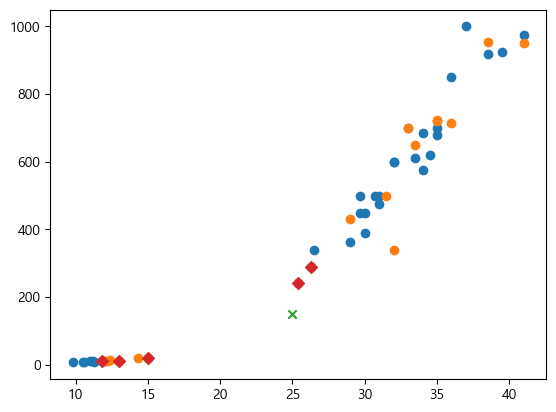

In [48]:
plt.scatter(train_X['l'], train_X['w'])
plt.scatter(test_X['l'], test_X['w'])
plt.scatter([25], [150], marker='x')
plt.scatter(train_X.iloc[indexes[0]]['l'], train_X.iloc[indexes[0]]['w'], marker='D')
plt.show()

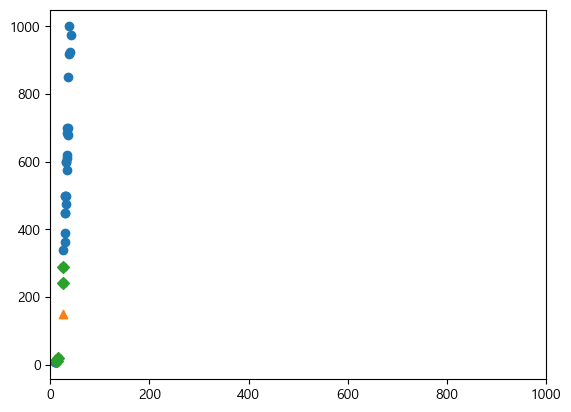

In [49]:
plt.scatter(train_X[:]['l'], train_X[:]['w'])
plt.scatter(25, 150, marker='^')
plt.scatter(train_X.iloc[indexes[0]]['l'], train_X.iloc[indexes[0]]['w'], marker='D')
plt.xlim((0, 1000))
plt.show()


In [50]:
import numpy as np
mean = np.mean(train_X, axis=0)
std = np.std(train_X, axis=0)
scaled_X = (train_X - mean) / std

C:\Users\trueb\AppData\Local\Temp\ipykernel_31420\1378715476.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(new[0], new[1], marker='^')


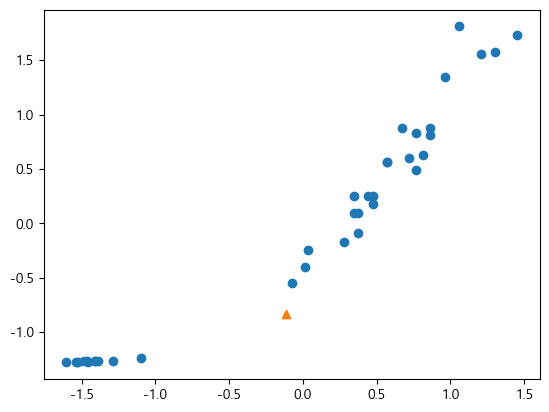

In [53]:
new = ([25, 150] - mean) / std
plt.scatter(scaled_X[:]['l'], scaled_X[:]['w'])
plt.scatter(new[0], new[1], marker='^')

In [54]:
# z-score 로 바꾸고 학습
kn.fit(scaled_X, train_y)
test_scaled_X = (test_X - mean) / std
kn.score(test_scaled_X, test_y)

1.0

In [55]:
kn.predict([new])

array([1])

C:\Users\trueb\AppData\Local\Temp\ipykernel_31420\4138014266.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(new[0], new[1], marker='^')


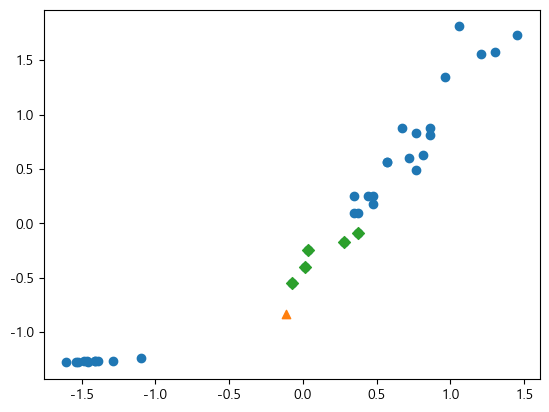

In [56]:
dist, indexes = kn.kneighbors([new])
plt.scatter(scaled_X[:]['l'], scaled_X[:]['w'])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(scaled_X.iloc[indexes[0]]['l'], scaled_X.iloc[indexes[0]]['w'], marker='D')
plt.show()